In [2]:
import os
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data

Here we are going to prepare the data to be used for the Variational autoncoder and for the analysis using logg and feh.

/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_76987/941303352.py:3: DtypeWarning: Columns (11,12,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  cluster_df=pd.read_csv('cluster_members_final.csv')


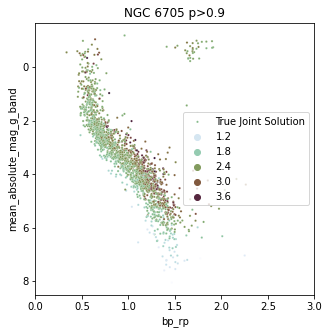

In [3]:
# Data input, take in the cluster and plot the memebrs
os.chdir("Data")
cluster_df=pd.read_csv('cluster_members_final.csv')
os.chdir("../")


f, axes = plt.subplots(1, 1)
f.set_figheight(5)
f.set_figwidth(5)

probability='p3'
cluster_df=cluster_df[cluster_df['phot_bp_mean_flux_error']<1000].reset_index(drop=True)

scatter=cluster_df[cluster_df[probability]>0.9]


sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],hue=scatter['rgeo'],s=5,ax=axes,label='True Joint Solution',color='b', palette="ch:r=1,l=1.0")
axes.invert_yaxis()
plt.legend()
axes.set_title("NGC 6705 p>0.9")
plt.xlim(0,3)
plt.show()


scatter=scatter[scatter['rgeo']>=1.8].reset_index(drop=True)
scatter=scatter[scatter['rgeo']<=2.5].reset_index(drop=True)
scatter=scatter[scatter['bp_rp']<=1.6].reset_index(drop=True)

orig_scatter=scatter

orig_scatter['rgeo']=scatter['rgeo'].median() #still assuming everything at the same distance
#set the main distance.
orig_scatter['rgeo']=2.0

cluster_df=scatter

Select the relevant columns

In [4]:
cluster_df=cluster_df[['ra','dec','parallax','phot_g_mean_mag','phot_g_mean_flux','phot_rp_mean_flux','phot_bp_mean_flux','phot_bp_mean_mag','phot_rp_mean_mag','bp_rp','mean_absolute_mag_g_band','ra_error','dec_error','parallax_error','phot_g_mean_flux_error','phot_bp_mean_flux_error','phot_rp_mean_flux_error','mh_gspphot','logg_gspphot']].reset_index(drop=True)



In [5]:
cluster_df

,ra,dec,parallax,phot_g_mean_mag,phot_g_mean_flux,phot_rp_mean_flux,phot_bp_mean_flux,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mean_absolute_mag_g_band,ra_error,dec_error,parallax_error,phot_g_mean_flux_error,phot_bp_mean_flux_error,phot_rp_mean_flux_error,mh_gspphot,logg_gspphot
0,282.605871,-6.285981,0.507387,16.404120,5.167716e+03,3876.549346,2425.859397,16.876379,15.776782,1.099597,4.856261,0.049640,0.053262,0.068056,3.639983,10.207194,14.392979,-2.0523,4.3641
1,282.610660,-6.223920,0.414973,15.952048,7.836598e+03,5993.184109,3729.496588,16.409416,15.303751,1.105665,4.090620,0.042647,0.041917,0.053403,4.474360,15.521529,8.868863,-0.7115,4.3682
2,282.610679,-6.250028,0.464578,16.118809,6.720840e+03,5265.982076,3198.065088,16.576324,15.444197,1.132128,4.479413,0.045167,0.044909,0.052555,3.836132,10.380806,18.499730,-0.8043,4.4274
3,282.615905,-6.195400,0.455174,16.738075,3.799412e+03,3552.040656,1709.063662,17.256647,15.871700,1.384947,4.786609,0.064142,0.066674,0.092999,4.374199,9.564557,21.343086,-2.6389,4.3434
4,282.617394,-6.285022,0.386008,14.585701,2.758459e+04,17640.015588,15755.160439,14.844985,14.131648,0.713337,2.684100,0.021657,0.020979,0.025863,10.341982,28.872372,83.859900,-0.1581,3.5979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,282.792623,-6.051856,0.424239,13.486980,7.588484e+04,53535.371005,38981.029432,13.861409,12.926293,0.935116,1.804319,0.016018,0.016901,0.021350,21.492193,38.411700,44.480198,-0.1351,3.4562
1097,282.840875,-6.043056,0.533869,16.632505,4.187401e+03,3402.451865,1810.603897,17.193983,15.918415,1.275568,5.241502,0.064591,0.069871,0.086673,3.368146,15.695131,20.524431,-3.6882,4.3134
1098,282.844474,-6.035441,0.555500,17.378784,2.105878e+03,1859.903861,834.630940,18.034805,16.574170,1.460636,5.682174,0.087949,0.103732,0.129928,2.685649,8.458553,20.671124,-1.5391,4.8375
1099,282.856958,-6.023364,0.436901,10.448225,1.246398e+06,888703.772511,633674.511865,10.833877,9.876003,0.957873,-1.190251,0.013677,0.013188,0.015801,297.194850,543.663600,344.572200,NaN,NaN


# Photometric Errors

Gaia recommends some changes to the photometric errors, see the documentation. I'm not sure the effect on different Gaia releases.

In [6]:
cluster_df['phot_g_mean_mag_error']=np.sqrt(((2.5/np.log(10))*cluster_df['phot_g_mean_flux_error']/cluster_df['phot_g_mean_flux'])**2+0.0027553202**2)
cluster_df['bp_error']=np.sqrt(((2.5/np.log(10))*cluster_df['phot_bp_mean_flux_error']/cluster_df['phot_bp_mean_flux'])**2+0.0037793818**2)
cluster_df['rp_error']=np.sqrt(((2.5/np.log(10))*cluster_df['phot_rp_mean_flux_error']/cluster_df['phot_rp_mean_flux'])**2+0.0027901700**2)
cluster_df['bp_rp_error']=np.sqrt(cluster_df['rp_error']**2+cluster_df['bp_error']**2)

In [7]:
cluster_df=cluster_df[cluster_df['logg_gspphot']>2.4]

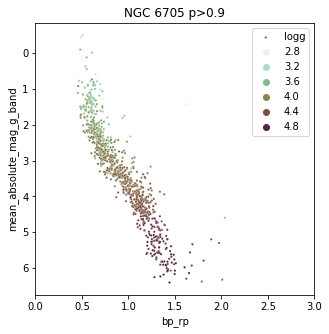

In [8]:
f, axes = plt.subplots(1, 1)
f.set_figheight(5)
f.set_figwidth(5)
sn.scatterplot(x=cluster_df['bp_rp'],y=cluster_df['mean_absolute_mag_g_band'],hue=cluster_df['logg_gspphot'],s=5,ax=axes,label='logg',color='b', palette="ch:r=1,l=1.0")
axes.invert_yaxis()
plt.legend()
axes.set_title("NGC 6705 p>0.9")
plt.xlim(0,3)
plt.show()

# Draw instances of each row.

We will draw instances from a Gaussian of each row to simulate the error in our data. This will then be fed into the VAE to get a MCMC estimate of the latent variables.

#### Prior on Distance

In general, we will need some sort of prior on distances. In this problem our distances are fairly ok regarding error so I will just invert the parallax as the distance.

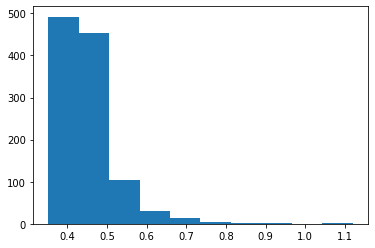

In [7]:
plt.hist(cluster_df['parallax'])
plt.show()

# Normal distribution draws

Eventually should put in the cross correlations but for now isotropic. The draws will be used later on training.

In [8]:
mean_x=cluster_df[['ra','dec','parallax','phot_g_mean_mag','bp_rp']].to_numpy()
var_x=cluster_df[['ra_error','dec_error','parallax_error','phot_g_mean_mag_error','bp_rp_error']].to_numpy()**2

### Here we make the draws and put the data into a new dataframe.

In [9]:
x_params=[]
x_var=[]
draw_size=32 
for i in range (len(mean_x)):
    mu=mean_x[i]
    sig=np.diag(var_x[i])
    draws = np.random.multivariate_normal(mu, sig, size=draw_size)

    x_params.append(draws)
    x_var.append(np.tile(sig,(draw_size,1)))



x_params=np.array(x_params)
x_params=x_params.reshape((x_params.shape[0]*x_params.shape[1],x_params.shape[2]))

x_var=np.array(x_var)
x_var=x_var.reshape((x_var.shape[0]*x_var.shape[1],x_var.shape[2]))

resampled_x=pd.DataFrame(data=x_params,columns=[['ra','dec','parallax','phot_g_mean_mag','bp_rp']])
resampled_err=pd.DataFrame(data=x_params,columns=[['ra_error','dec_error','parallax_error','phot_g_mean_mag_error','bp_rp_error']])
resampled_x['ra']=resampled_x['ra']%360
resampled_x['dec']=resampled_x['dec']%360

### Turn the apperant mag into absolute mag

In [10]:
def mean_basolute_mag_g_band(selection_gaia):

    return selection_gaia['phot_g_mean_mag'].values+5*np.log10(selection_gaia['parallax'].values/1000)+5
    

resampled_x['G']=mean_basolute_mag_g_band(resampled_x)
cluster_df['G']=mean_basolute_mag_g_band(cluster_df)
x_resample=pd.concat([resampled_x,resampled_err],axis=1)

/var/folders/tm/gnjj0w_d6vj9x6q_ww3f6jsw0000gn/T/ipykernel_21111/3818395397.py:3: RuntimeWarning: invalid value encountered in log10
  return selection_gaia['phot_g_mean_mag'].values+5*np.log10(selection_gaia['parallax'].values/1000)+5


Overview of the resampled dataframe

In [11]:
cluster_df=cluster_df.dropna().reset_index(drop=True)

# Input Data

This plus the error is the data which is to go into the variational autoencoder.

In [12]:
os.chdir("Data")
x_input=cluster_df[['ra','dec','parallax','phot_g_mean_mag','bp_rp','G']]
x_input_err=cluster_df[['ra_error','dec_error','parallax_error','phot_g_mean_mag_error','bp_rp_error']]


Save it to the CSV

In [13]:

x_input.to_csv('x_input')
x_input_err.to_csv('x_input_err')
cluster_df.to_csv('clusterdf')
os.chdir("..")

# Isochrone preparing

The goal here is to derive the likelihood function easily.

In [14]:
import minimint

In [15]:
filters = ["Gaia_G_EDR3", "Gaia_BP_EDR3", 'Gaia_RP_EDR3']
ii = minimint.Interpolator(filters)


# Variational Autoencoder

# Prior $P(z)$



Find nearest will return the isochrone with the closest values of the latent variables. The prior will ensure that the value of the latent variables stay within their physical bounds.

In [16]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx],idx

def isochrone_selector(feh,age):
    '''if(feh<-4 or feh>0.5):
        raise NotImplementedError
    if(age<5 or age>10.3):
        raise NotImplementedError
    else:'''
    logagegrid = np.linspace(5,10.3,105)
    fehgrid = np.linspace(-4,0.5,90)
    feh,feh_idx=find_nearest(fehgrid,feh)
    age,age_idx=find_nearest(logagegrid,age)

    return feh_idx*len(logagegrid)+age_idx

# Likelihood function $P(x|z)$
Given our sample of $z$ - the extinction, age and metalicity, our likelihood will be defined as the perpendicular distance from the isochrone. 
Build a CSV of all the possible isochrones.

In [17]:
massgrid = 10*np.linspace(np.log10(0.1),np.log10(10), 1000)
logagegrid = np.linspace(5,10.3,105)
fehgrid = np.linspace(-4,0.5,90)
dfs=[]
for feh in fehgrid:
    for lage in logagegrid:
        iso = pd.DataFrame(ii(massgrid, lage, feh))
        dfs.append(iso[iso['phase']==0].reset_index(drop=True))
    

(20.0, -15.0)

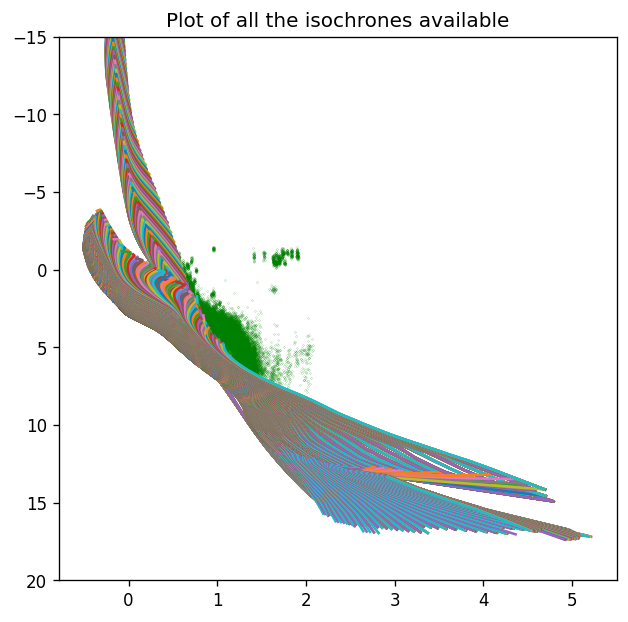

In [18]:
fig = plt.figure(figsize=(6, 6), dpi=120)
for isochrone in dfs:
    plt.plot(isochrone['Gaia_BP_EDR3']-isochrone['Gaia_RP_EDR3'], isochrone['Gaia_G_EDR3'],
                    )
    
    
plt.scatter(resampled_x['bp_rp'],resampled_x['G'],color='g',s=0.01)
plt.title('Plot of all the isochrones available')
plt.ylim(20, -15)

(20.0, -15.0)

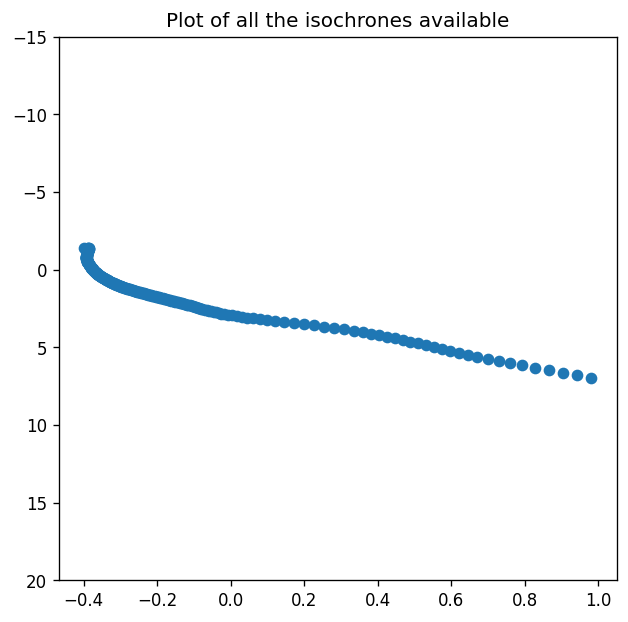

In [21]:
isochrone=dfs[1000]
fig = plt.figure(figsize=(6, 6), dpi=120)

plt.scatter(isochrone['Gaia_BP_EDR3']-isochrone['Gaia_RP_EDR3'], isochrone['Gaia_G_EDR3'],
                    )
    
    

plt.title('Plot of all the isochrones available')
plt.ylim(20, -15)

### Find local tangents to the isochrone, and their perpendicular slopes.

In [20]:
for isochrone in dfs:
    p_slopes=[]
    isochrone['BPRP']=isochrone['Gaia_BP_EDR3']-isochrone['Gaia_RP_EDR3']
    x=isochrone['BPRP']
    y=isochrone['Gaia_G_EDR3']
    
    for i in range(len(isochrone)-1):    
        dy=y[i+1]-y[i]
        dx=x[i+1]-x[i]
        p_slopes.append(-1*dx/dy)
    p_slopes.append(0)

    isochrone['p_slopes']=p_slopes
    isochrone['slopes']=-1/isochrone['p_slopes']

    high_c=[]
    low_c=[]
    for i in range(len(isochrone)-1):
        high_c.append(isochrone['Gaia_G_EDR3'][i+1] - isochrone['p_slopes'][i]*isochrone['BPRP'][i+1])
        low_c.append(isochrone['Gaia_G_EDR3'][i] - isochrone['p_slopes'][i]*isochrone['BPRP'][i])
    high_c.append(0)
    low_c.append(0)
    isochrone['low_c']=high_c #high c is low c oops
    isochrone['high_c']=low_c
    isochrone=isochrone[:-2]
    

### The next function allows us to use the name of the columns and return the tensor index.

In [22]:
def column_index(name):
    if name in cluster_df.columns:
        return np.where(np.array(cluster_df.columns)==name)[0][0]
    else:
        return np.where(np.array(dfs[0].columns)==name)[0][0] +len(cluster_df.columns)

# x_values and stacked_isochrones

xvalues is the values from the cluster or data sample, which has been padded to excess so that all are the same size. The chosen size is the length of the largest isochrone. stacked_isochrones are these isochrones stacked on top of eachother.

In [29]:
import torch
a=torch.tensor([[1,2],[3,4],[5,6]])
a=a.reshape((1,a.shape[0],a.shape[1]))
a[0,:,0]


tensor([1, 3, 5])

In [23]:
import torch
tens=[]
lengths=[]
for isochrone in dfs:
    isoc=torch.tensor(isochrone.values).reshape((1,isochrone.shape[1],isochrone.shape[0]))
    tens.append(isoc)
    lengths.append(isoc.shape[-1])

x_values=cluster_df.values
x_values=torch.tensor(x_values)
x_values=x_values.reshape((x_values.shape[0],x_values.shape[1],1))
import torch.nn.functional as F
pad_size=np.max(lengths)


stack_tens=[]
for i in range(len(tens)):
    t=F.pad(input=tens[i], pad=(0,pad_size-tens[i].shape[-1]), value=torch.nan)
    stack_tens.append(t.reshape(t.shape[1:]))


In [24]:
stacked_isochrones=torch.stack(stack_tens)
x_values=x_values.expand(x_values.shape[0],x_values.shape[1],pad_size)


In [30]:
dfs[1000].sort_values('logg')

,logg,logteff,logl,mass,logage,feh,phase,Gaia_RP_EDR3,Gaia_G_EDR3,Gaia_BP_EDR3,BPRP,p_slopes,slopes,low_c,high_c
254,4.222333,4.382730,3.453660,5.655656,7.802885,-3.544944,0.0,-1.150719,-1.405470,-1.537867,-0.387148,-0.155710,6.422213,-1.481319,-1.465753
255,4.222833,4.385655,3.466382,5.675676,7.802885,-3.544944,0.0,-1.164337,-1.420668,-1.553852,-0.389514,0.466728,-2.142576,-1.213396,-1.238871
253,4.229485,4.382028,3.442177,5.635636,7.802885,-3.544944,0.0,-1.126219,-1.380574,-1.512761,-0.386542,-0.024327,41.106099,-1.414889,-1.389978
252,4.239489,4.382175,3.431238,5.615616,7.802885,-3.544944,0.0,-1.097739,-1.352151,-1.484349,-0.386609,0.002360,-423.668615,-1.379662,-1.351238
251,4.250491,4.382658,3.420634,5.595596,7.802885,-3.544944,0.0,-1.067984,-1.322631,-1.454928,-0.386944,0.011331,-88.255865,-1.347770,-1.318247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4.798980,3.745886,-0.609311,0.650651,7.802885,-3.544944,0.0,5.808604,6.312537,6.637257,0.828653,-0.233020,4.291474,6.348672,6.505630
3,4.813692,3.737137,-0.672905,0.630631,7.802885,-3.544944,0.0,5.948911,6.471814,6.814620,0.865708,-0.232645,4.298395,6.505319,6.673217
2,4.829180,3.728338,-0.737509,0.610611,7.802885,-3.544944,0.0,6.092925,6.635527,6.997923,0.904997,-0.239989,4.166861,6.679575,6.852716
1,4.846621,3.719760,-0.803749,0.590591,7.802885,-3.544944,0.0,6.241574,6.803425,7.185050,0.943476,-0.229176,4.363466,6.842930,7.019647


In [31]:
isochrone.sort_values('logg')

,logg,logteff,logl,mass,logage,feh,phase,Gaia_RP_EDR3,Gaia_G_EDR3,Gaia_BP_EDR3,BPRP,p_slopes,slopes,low_c,high_c
155,-3.544944,3.497407,2.738544,-0.164404,1.794009,4.734854,2.110065,7.802885,0.000000,0.418374,-0.369650,29.119604,-0.474658,4.390974,5.575576
35,-3.544944,4.129048,3.101295,-0.135820,1.964790,4.720842,2.008439,7.802885,0.000000,0.542859,-0.362916,30.243457,-0.326851,4.390958,5.415415
230,-3.544944,3.221615,2.552574,-0.163649,1.694483,4.742227,2.170205,7.802885,0.000000,0.337783,-0.372995,36.014925,-0.565584,4.389693,5.675676
50,-3.544944,4.039104,3.048408,-0.136446,1.942271,4.722596,2.021573,7.802885,0.000000,0.527524,-0.363782,27.737973,-0.344498,4.391079,5.435435
65,-3.544944,3.952246,2.997431,-0.139442,1.921083,4.724557,2.034489,7.802885,0.000000,0.512149,-0.364634,26.142273,-0.363024,4.391168,5.455455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,7.802885,0.000000,2.644983,-0.135318,6.092681,1.435849,4.262311,3.233233,-3.544944,0.605807,-0.036505,-0.029500,-0.547392,4.402500,3.442177
124,7.802885,0.000000,2.823684,-0.114921,6.183397,1.525293,4.250183,3.133133,-3.544944,0.682046,0.049200,-0.034703,-0.457430,4.442909,3.389848
154,7.802885,0.000000,2.751077,-0.123364,6.225713,1.487657,4.255097,3.173173,-3.544944,0.651853,0.015096,-0.034341,-0.492812,4.427472,3.410180
79,7.802885,0.000000,2.946386,-0.102381,6.371632,1.580863,4.242225,3.073073,-3.544944,0.726697,0.099573,-0.038059,-0.401519,4.465258,3.360524


Text(0.5, 1.0, 'Plot of all the isochrones available')

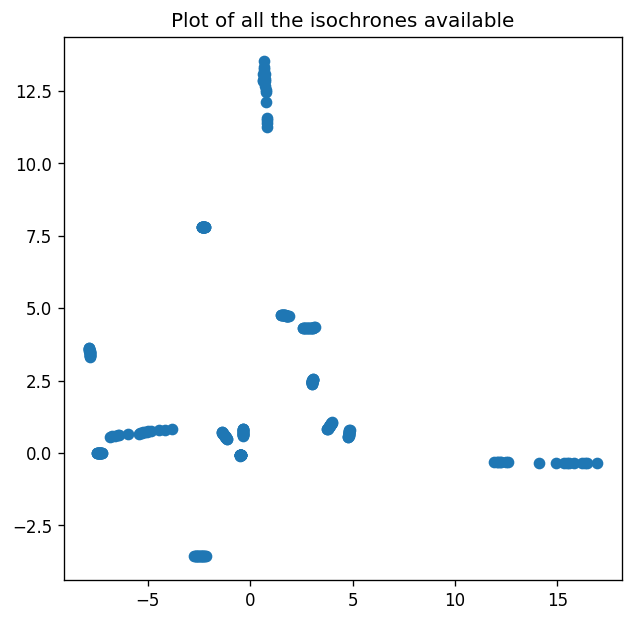

In [26]:
isochrone=pd.DataFrame(np.array(stacked_isochrones[1000]).transpose(),columns=dfs[0].columns).dropna()
fig = plt.figure(figsize=(6, 6), dpi=120)

plt.scatter(isochrone['Gaia_BP_EDR3']-isochrone['Gaia_RP_EDR3'], isochrone['Gaia_G_EDR3'],
                    )
    
    

plt.title('Plot of all the isochrones available')
#plt.ylim(20, -15)

# Export data

The data being exported here are stacked isochrones and the cluster data. We have functions to find the column names and the isochrone.

In [ ]:
import pickle
os.chdir("Data")

t_np = stacked_isochrones.numpy() #convert to Numpy array
output=open('isochrones.pkl','wb') #convert to a dataframe
pickle.dump(t_np,output) #save to file

t_np = x_values.numpy() #convert to Numpy array
output=open('x_values.pkl','wb') #convert to a dataframe
pickle.dump(t_np,output)#save to file



In [ ]:
t_np = np.array(cluster_df.columns) #convert to Numpy array
output=open('columns.pkl','wb') #convert to a dataframe
pickle.dump(t_np,output)#save to file



In [ ]:
os.chdir("Data")

FileNotFoundError: [Errno 2] No such file or directory: 'Data'

In [ ]:
t_np = np.array(dfs[0].columns).astype(str) #convert to Numpy array
output=open('isoc_cols.pkl','wb') #convert to a dataframe
pickle.dump(t_np,output)#save to file



In [ ]:
os.chdir('..')